In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Show all columns
pd.set_option('display.max_columns', None)

# Show all rows 
pd.set_option('display.max_rows', None)

# Show full content in each cell
pd.set_option('display.max_colwidth', None)

In [3]:
# Loading the dataset
df = pd.read_csv('Training.csv',index_col=False)

In [4]:
df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         0                    0                    0   
3               0         0                    0                    0   
4               0         0                    0                    0   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       0                 0                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  fluid_over

In [5]:
df.shape

(4920, 134)

In [6]:
df['prognosis'].value_counts()

prognosis
Fungal infection                           120
Allergy                                    120
GERD                                       120
Chronic cholestasis                        120
Drug Reaction                              120
Peptic ulcer diseae                        120
AIDS                                       120
Diabetes                                   120
Gastroenteritis                            120
Bronchial Asthma                           120
Hypertension                               120
Migraine                                   120
Cervical spondylosis                       120
Paralysis (brain hemorrhage)               120
Jaundice                                   120
Malaria                                    120
Chicken pox                                120
Dengue                                     120
Typhoid                                    120
hepatitis A                                120
Hepatitis B                                120
Hep

In [7]:
len(df['prognosis'].unique())

41

In [8]:
# Checking for null values
df.isnull().sum()

itching                              0
skin_rash                            0
nodal_skin_eruptions                 0
continuous_sneezing                  0
shivering                            0
chills                               0
joint_pain                           0
stomach_pain                         0
acidity                              0
ulcers_on_tongue                     0
muscle_wasting                       0
vomiting                             0
burning_micturition                  0
spotting_ urination                  0
fatigue                              0
weight_gain                          0
anxiety                              0
cold_hands_and_feets                 0
mood_swings                          0
weight_loss                          0
restlessness                         0
lethargy                             0
patches_in_throat                    0
irregular_sugar_level                0
cough                                0
high_fever               

In [9]:
# Dropping column
df.drop(columns='Unnamed: 133',axis=1,inplace=True)

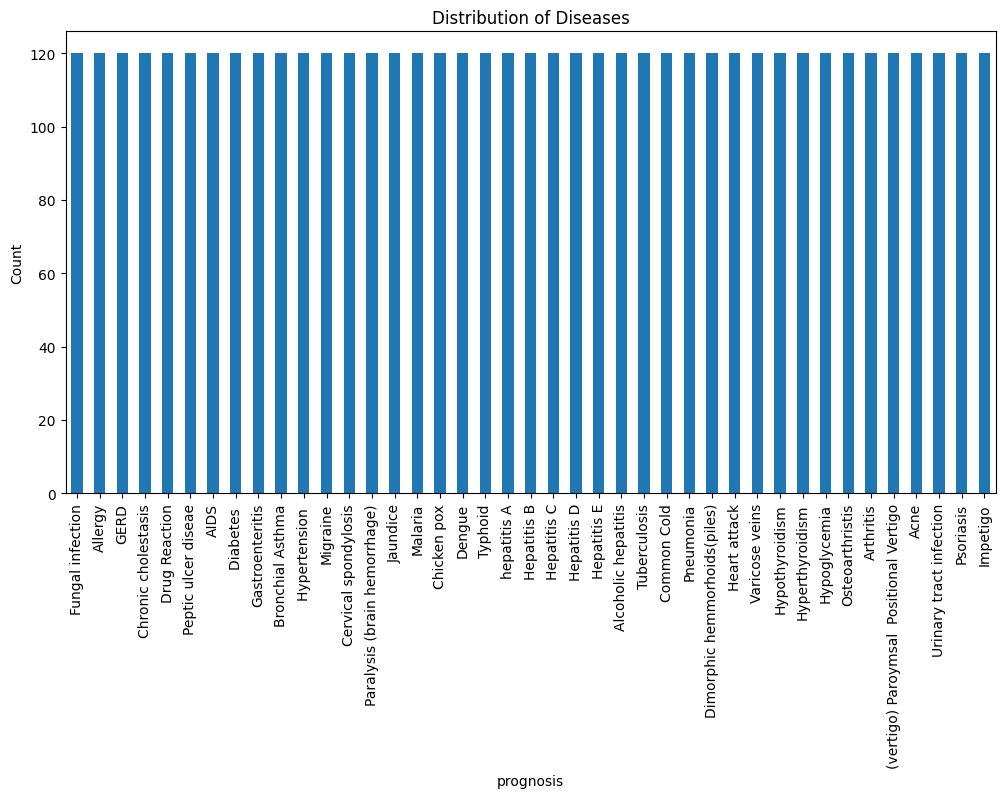

In [10]:
# Distribution of target variable (disease)
plt.figure(figsize=(12,6))
df['prognosis'].value_counts().plot(kind='bar')
plt.title("Distribution of Diseases")
plt.ylabel("Count")
plt.show()


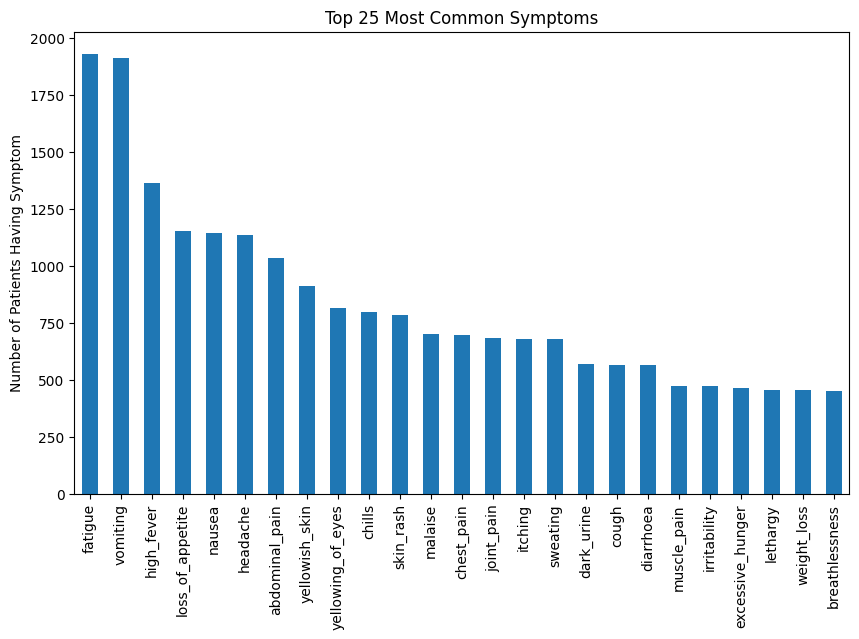

In [11]:
# Finding top 25 common symptoms
symptom_counts = df.drop(columns=['prognosis']).sum().sort_values(ascending=False)[:25]
plt.figure(figsize=(10,6))
symptom_counts.plot(kind='bar')
plt.title("Top 25 Most Common Symptoms")
plt.ylabel("Number of Patients Having Symptom")
plt.show()

The most frequently reported symptoms are fatigue and vomiting. 

High fever is the next most common, affecting over 1300 patients, followed by loss of appetite, nausea, headache, and abdominal pain, all reported by around 1100–1200 patients. These suggest a strong cluster of systemic and gastrointestinal-related symptoms.

Less common but still notable symptoms include cough, diarrhoea, muscle pain, irritability, excessive hunger, lethargy, weight loss, and breathlessness, each affecting 450–600 patients.

the data shows that while some symptoms are very common and general, others provide specific diagnostic clues that can help narrow down possible diseases.

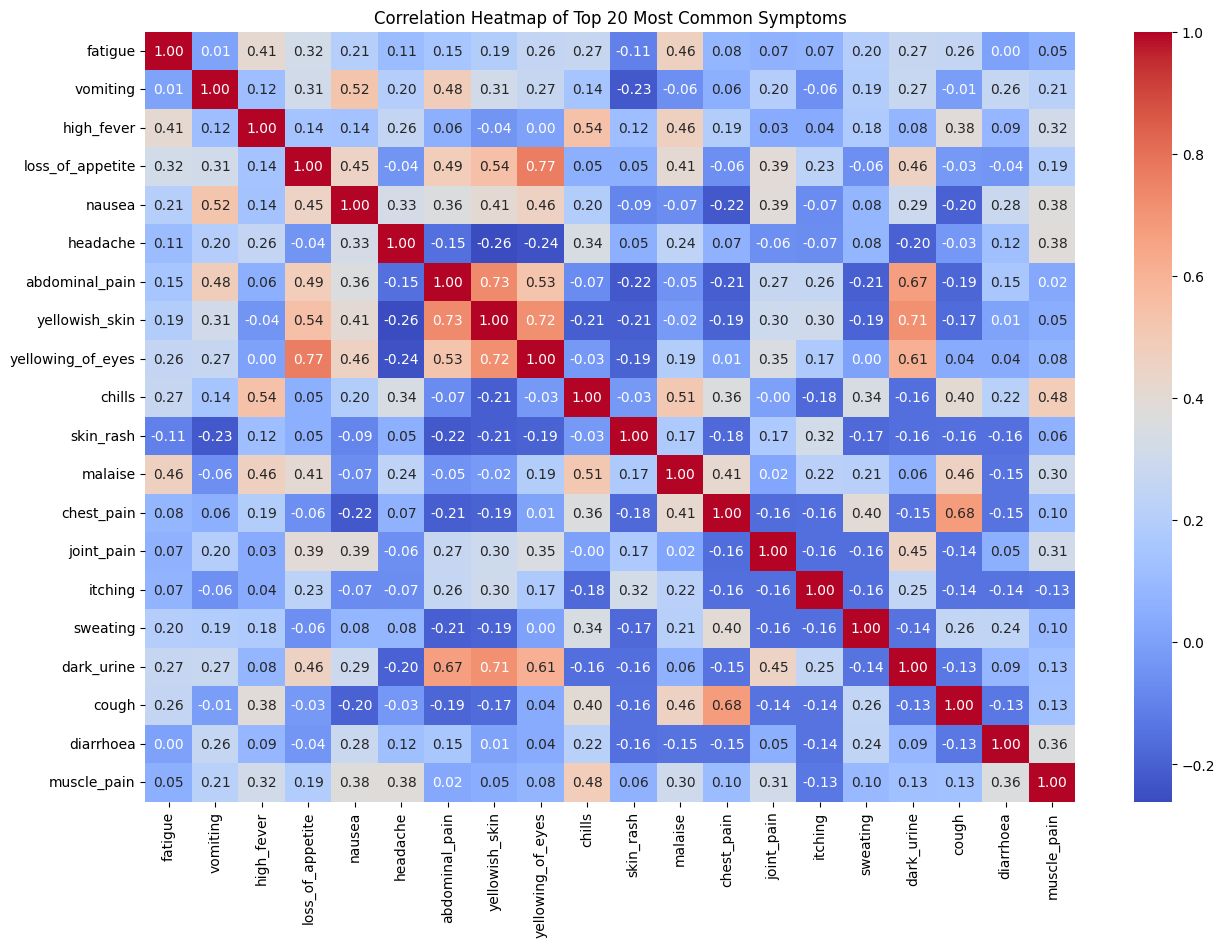

In [12]:
# Finding top 20 most common symptoms
symptom_counts = df.drop(columns=['prognosis']).sum().sort_values(ascending=False)
top_20_symptoms = symptom_counts.index[:20]

# Correlation heatmap for top 20 symptoms
plt.figure(figsize=(15,10))
corr = df[top_20_symptoms].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", cbar=True,fmt=".2f")
plt.title("Correlation Heatmap of Top 20 Most Common Symptoms")
plt.show()


In [13]:
import warnings
warnings.filterwarnings('ignore')

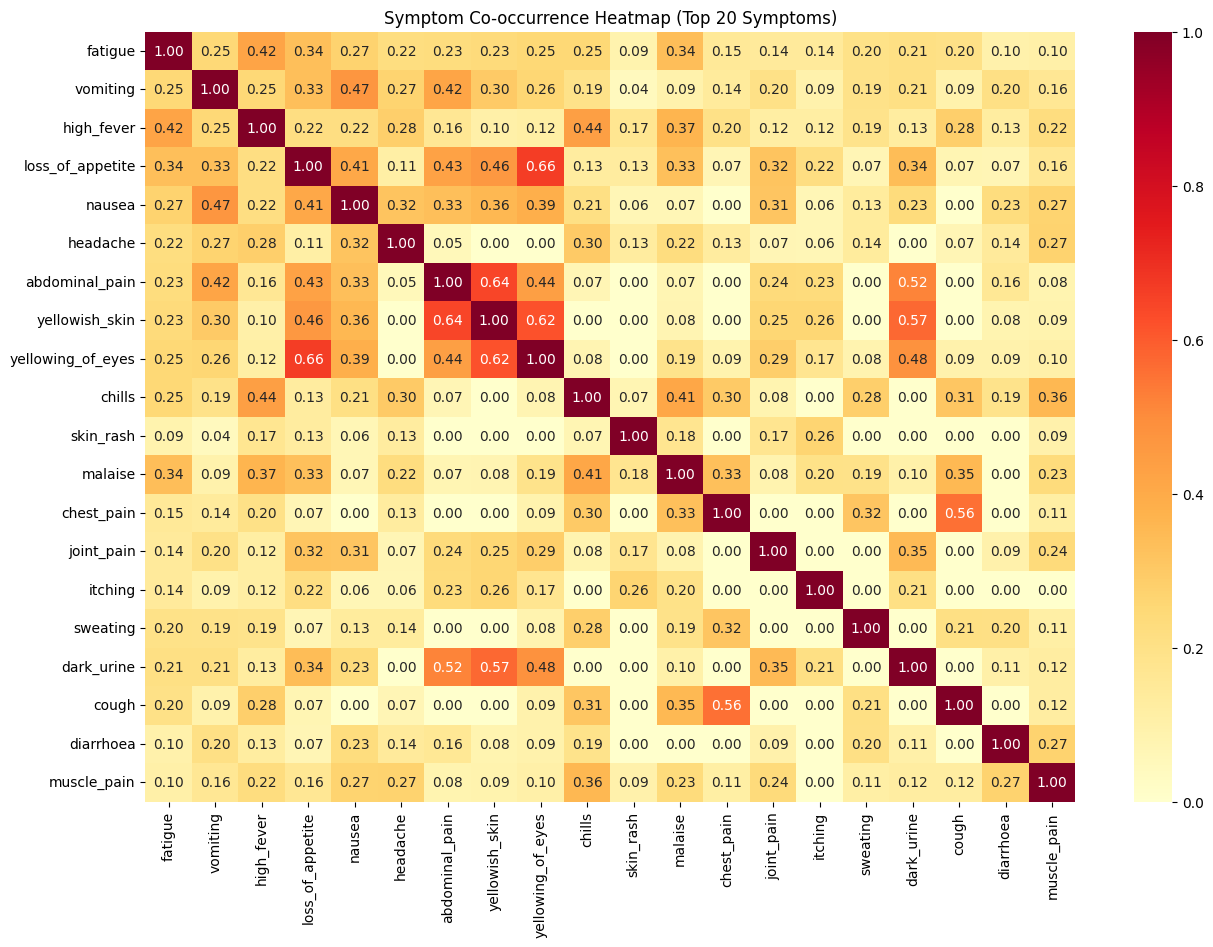

In [14]:
# Finding co-occurance of top symptoms
from sklearn.metrics import jaccard_score

# Binary symptom matrix
symptom_df = df.drop(columns=['prognosis'])

# Compute co-occurrence matrix (Jaccard similarity between symptoms)
co_matrix = pd.DataFrame(index=symptom_df.columns, columns=symptom_df.columns)

for col1 in symptom_df.columns:
    for col2 in symptom_df.columns:
        co_matrix.loc[col1, col2] = jaccard_score(symptom_df[col1], symptom_df[col2])

co_matrix = co_matrix.astype(float)

# Heatmap for top 20 symptoms
plt.figure(figsize=(15,10))
sns.heatmap(co_matrix.loc[top_20_symptoms, top_20_symptoms], cmap="YlOrRd",annot=True,fmt=".2f")
plt.title("Symptom Co-occurrence Heatmap (Top 20 Symptoms)")
plt.show()


Yellowing of skin & Yellowing of eyes

Loss of appetite & Yellowing of eyes

Abdominal pain & Yellowing of skin

Cough & Chest pain

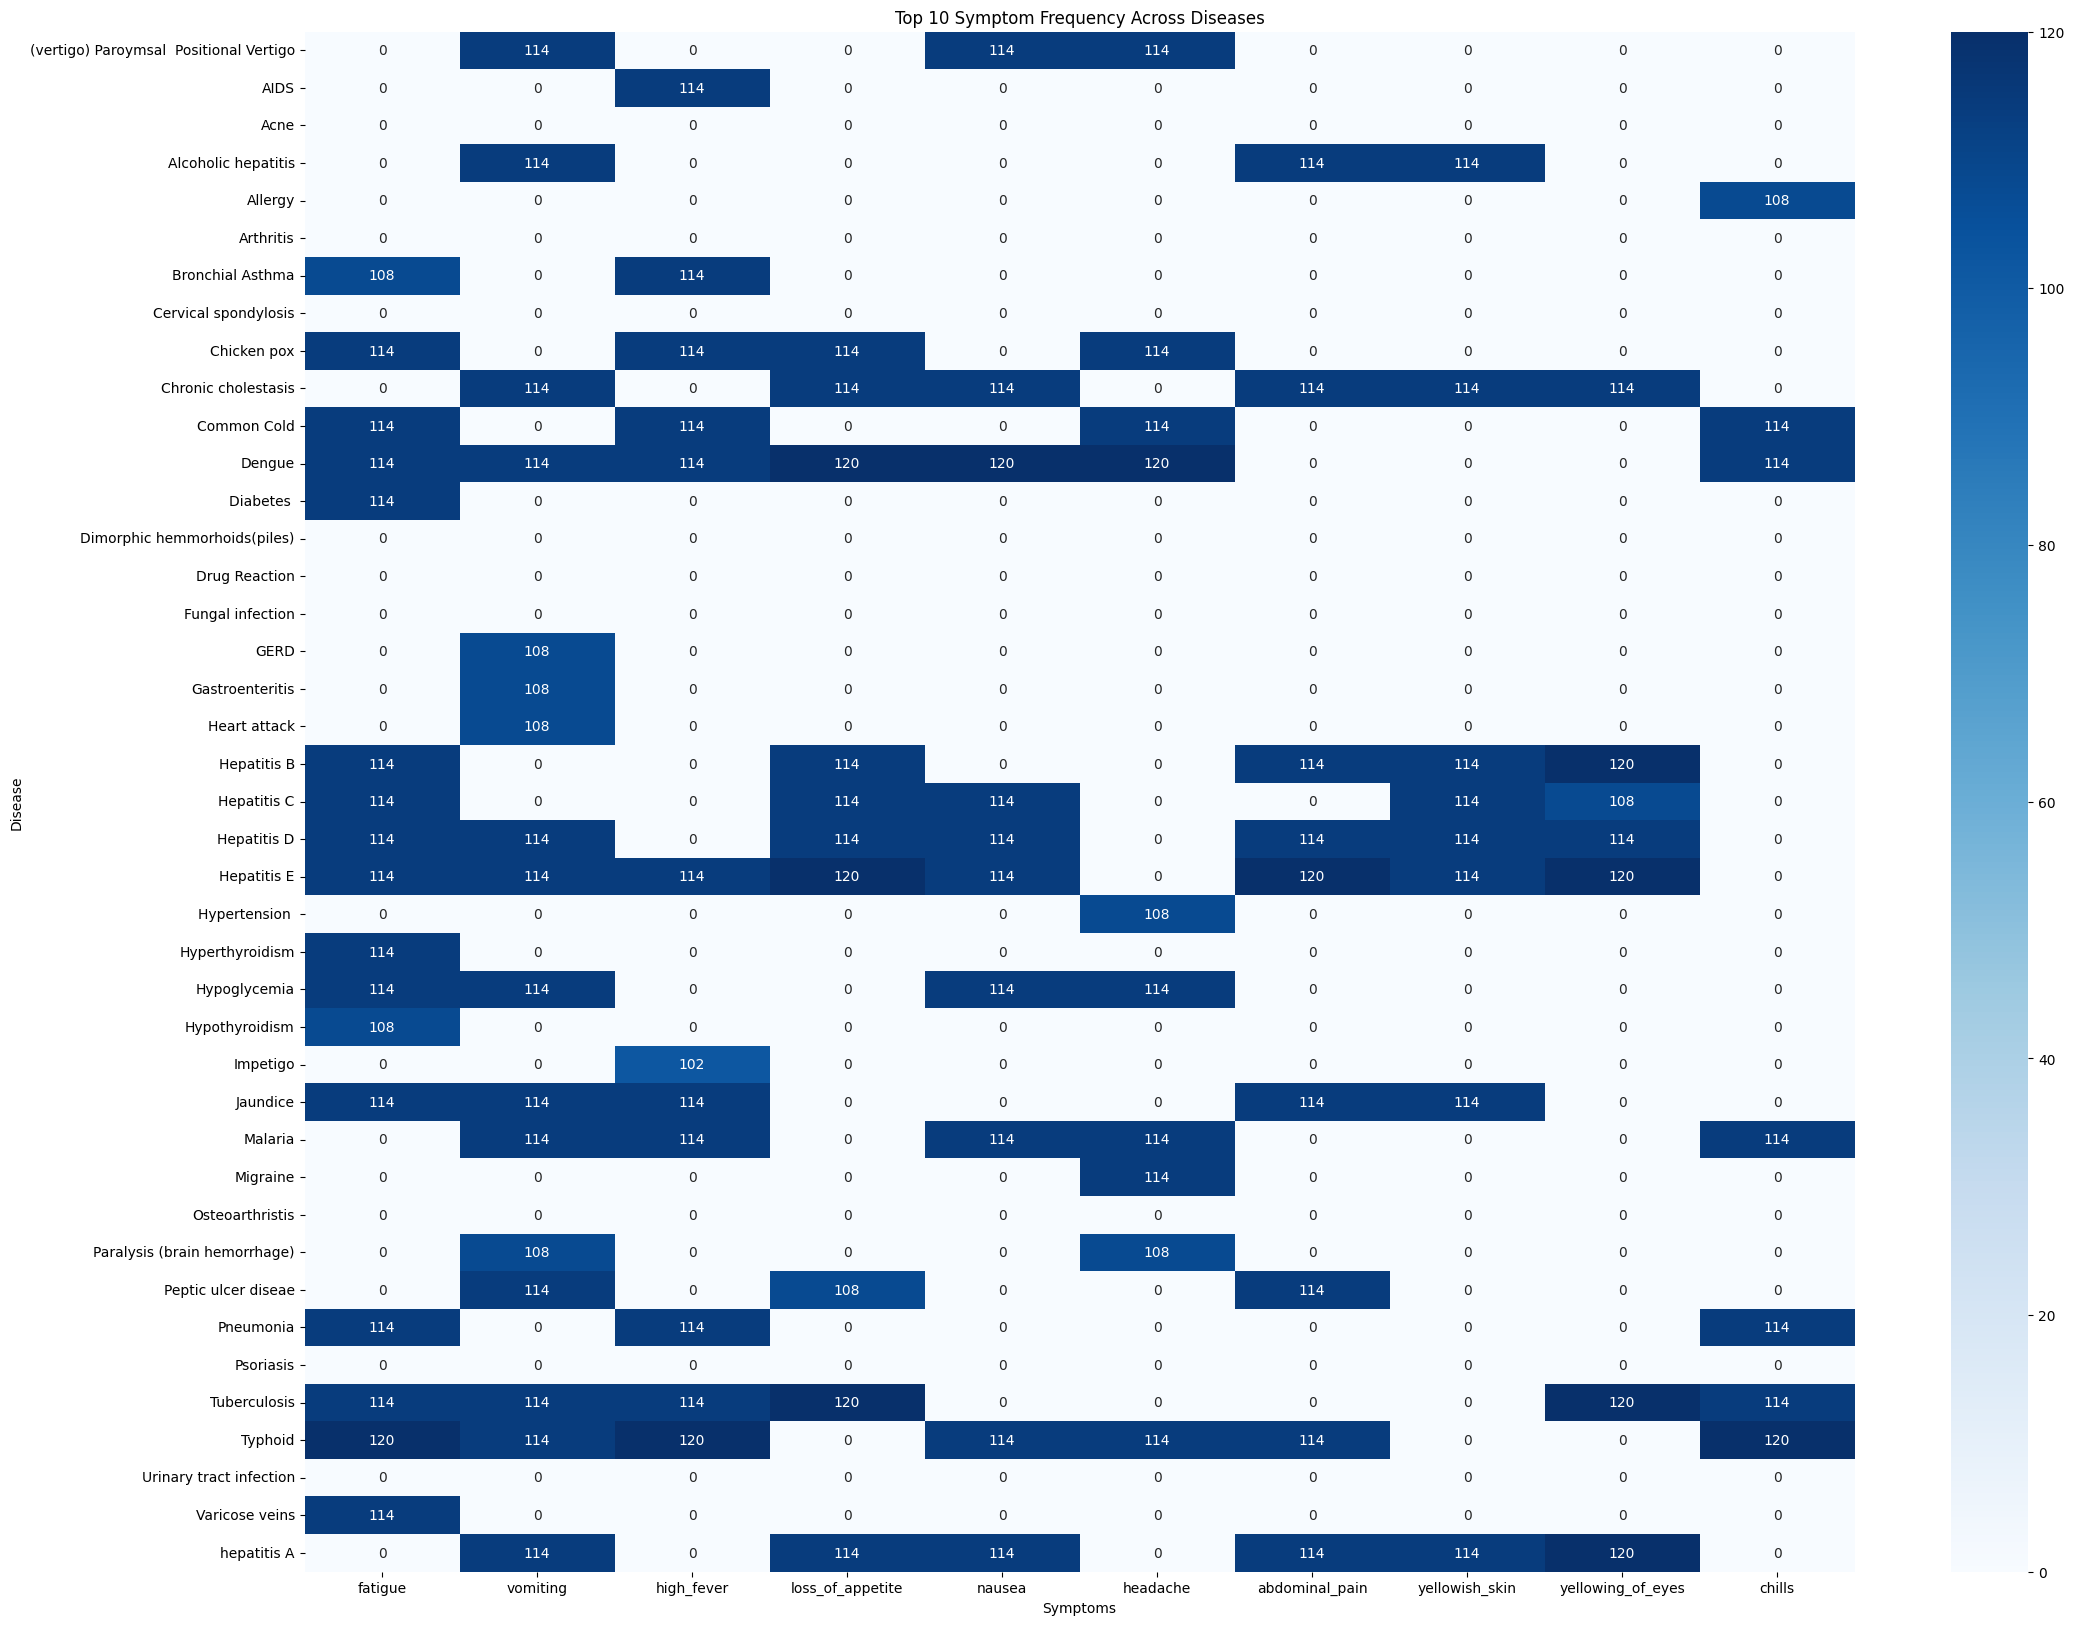

In [15]:
# Count how often each symptom occurs per disease
symptom_disease_matrix = df.groupby("prognosis").sum()

plt.figure(figsize=(25,20))
sns.heatmap(symptom_disease_matrix[top_20_symptoms[:10]], cmap="Blues", cbar=True,annot=True,fmt="d")
plt.title("Top 10 Symptom Frequency Across Diseases")
plt.xlabel("Symptoms")
plt.ylabel("Disease")
plt.show()


In [16]:
X = df.drop('prognosis', axis=1)
X.isnull().sum()

itching                           0
skin_rash                         0
nodal_skin_eruptions              0
continuous_sneezing               0
shivering                         0
chills                            0
joint_pain                        0
stomach_pain                      0
acidity                           0
ulcers_on_tongue                  0
muscle_wasting                    0
vomiting                          0
burning_micturition               0
spotting_ urination               0
fatigue                           0
weight_gain                       0
anxiety                           0
cold_hands_and_feets              0
mood_swings                       0
weight_loss                       0
restlessness                      0
lethargy                          0
patches_in_throat                 0
irregular_sugar_level             0
cough                             0
high_fever                        0
sunken_eyes                       0
breathlessness              

In [17]:
# Using PCA for dimensional Reduction 
# Taking 0.95 variance of the data
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

In [18]:
X_pca.shape

(4920, 36)

In [19]:
print("Number of components chosen:", pca.n_components_)

Number of components chosen: 36


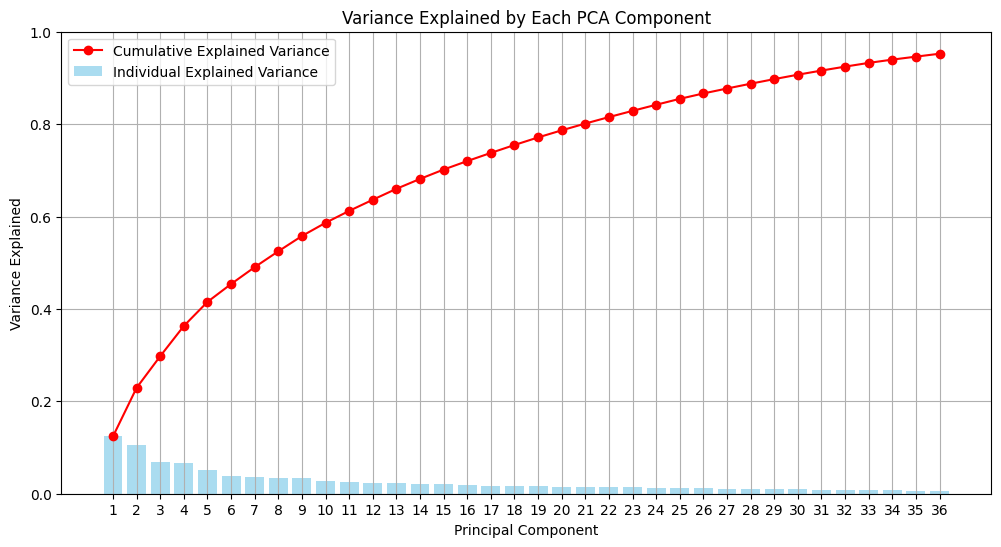

In [20]:
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

plt.figure(figsize=(12,6))

plt.bar(range(1, 37), explained_var, alpha=0.7, color='skyblue', label='Individual Explained Variance')

plt.plot(range(1, 37), cum_var, color='red', marker='o', label='Cumulative Explained Variance')

plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Each PCA Component')
plt.xticks(range(1, 37))
plt.legend()
plt.grid(True)
plt.show()

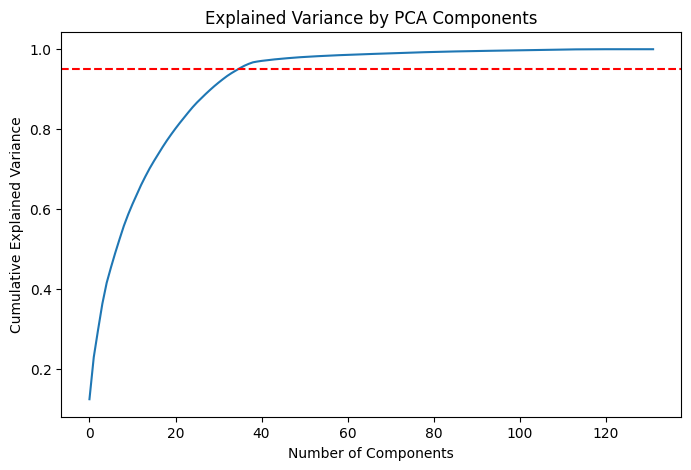

In [21]:
pca_full = PCA().fit(X)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()


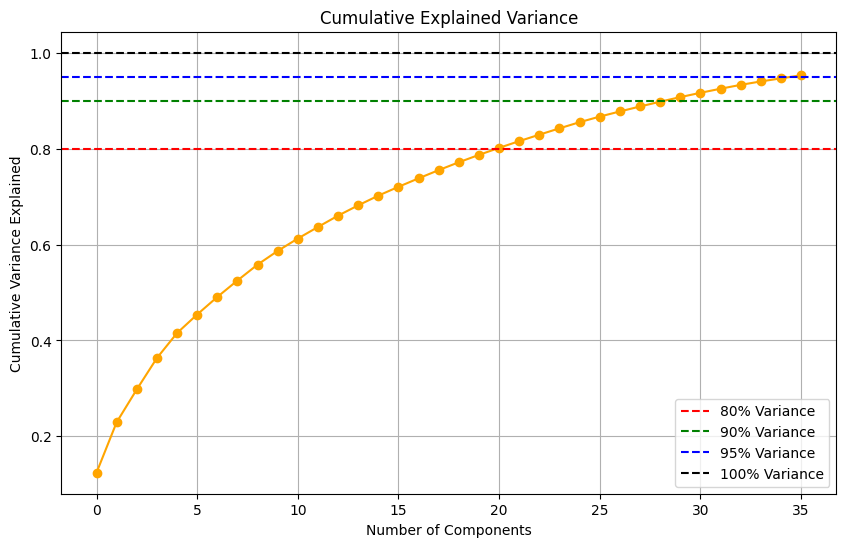

In [22]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='orange')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='b', linestyle='--', label='95% Variance')
plt.axhline(y=1, color='black', linestyle='--', label='100% Variance')

plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid(True)
plt.show()


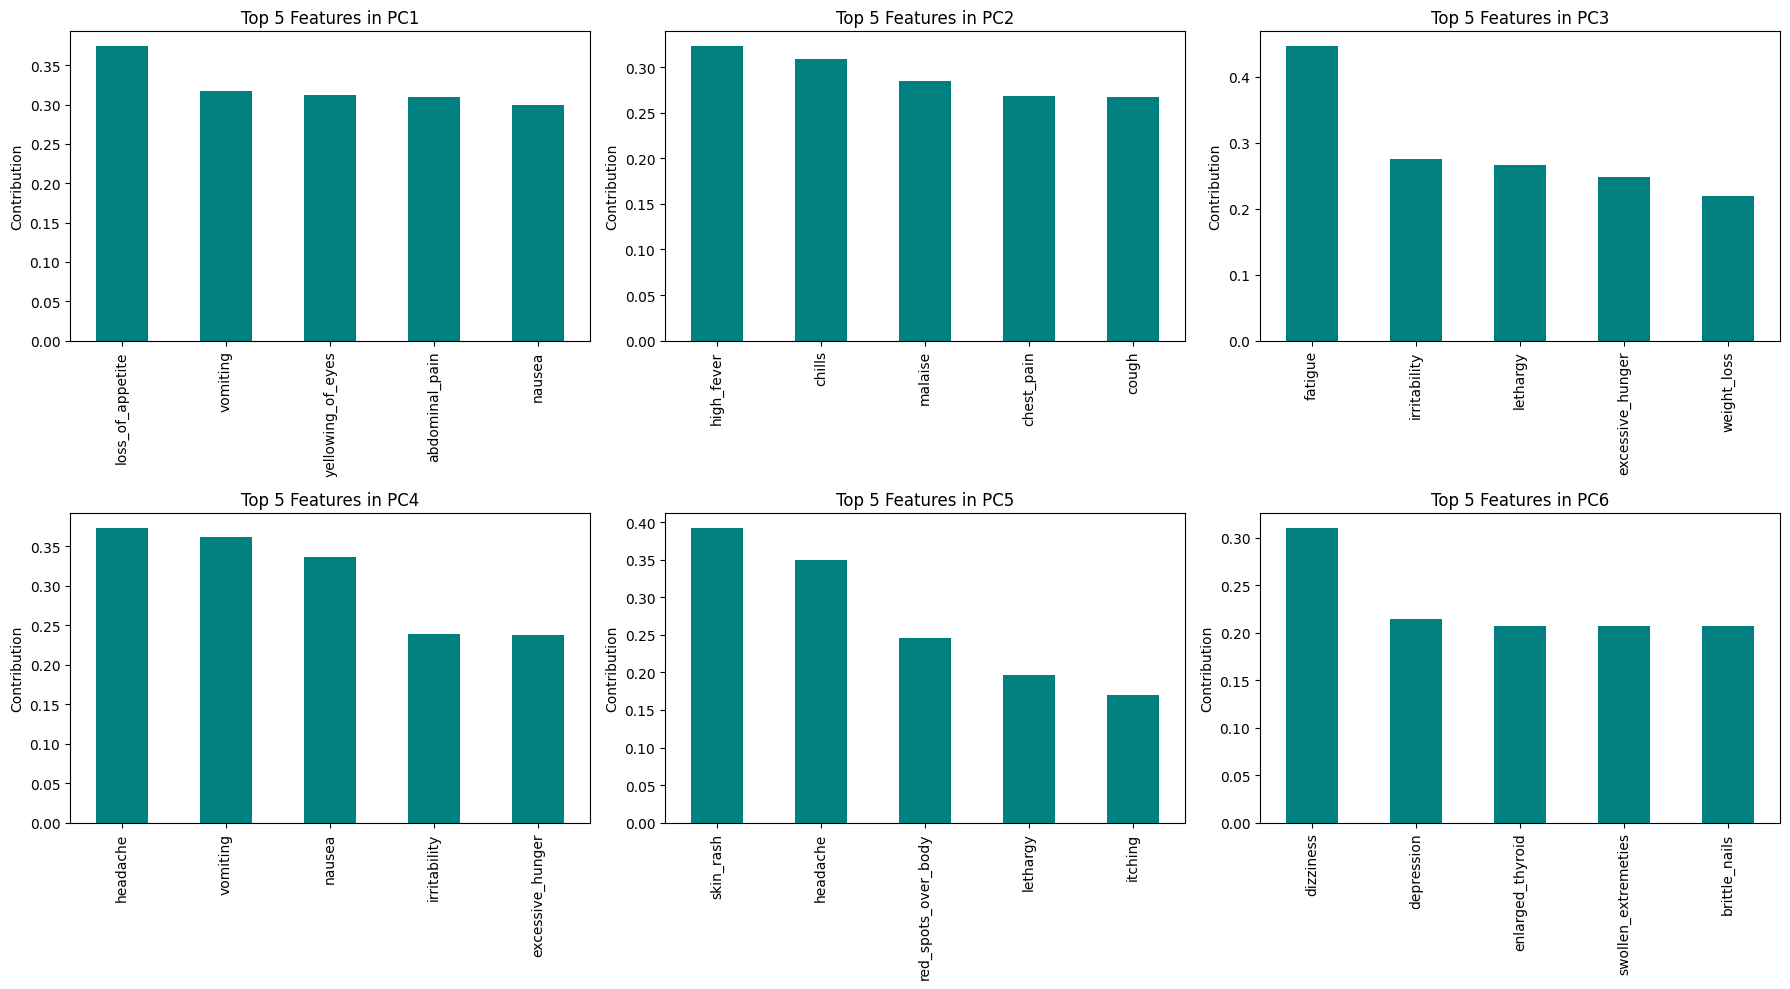

In [23]:
# Top 5 Features in each PCA
num_top_features = 5
pcs_to_plot = 6

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  
axes = axes.flatten() 

for i in range(pcs_to_plot):
    top_features = pd.Series(pca.components_[i], index=X.columns).sort_values(ascending=False)[:num_top_features]
    top_features.plot(kind='bar', color='teal', ax=axes[i])
    axes[i].set_title(f'Top {num_top_features} Features in PC{i+1}')
    axes[i].set_ylabel('Contribution')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

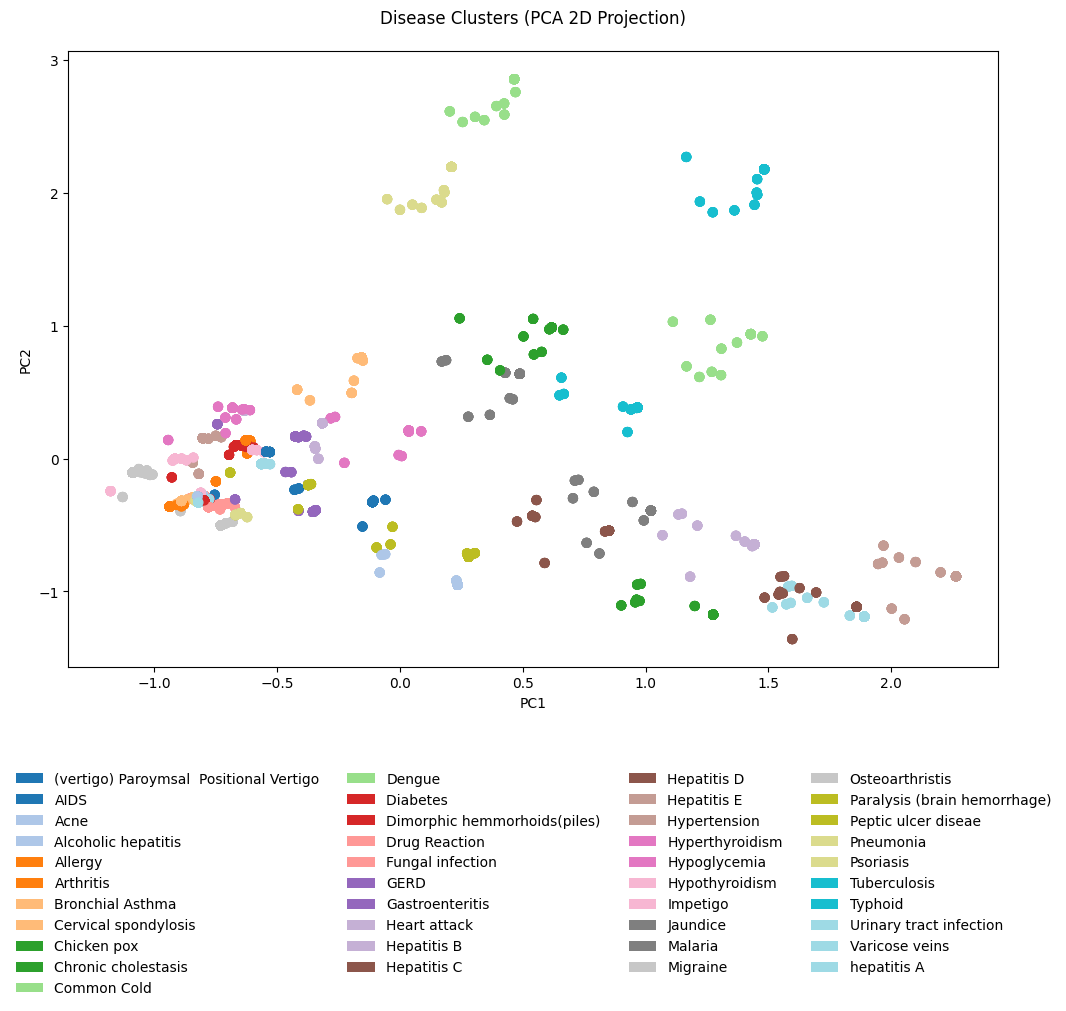

In [24]:
from sklearn.preprocessing import LabelEncoder
from matplotlib.patches import Patch

pca_df = pd.DataFrame(X_pca[:,0:2], columns=['PC1','PC2'])
pca_df['Disease'] = df['prognosis']
le = LabelEncoder()
pca_df['Disease_code'] = le.fit_transform(pca_df['Disease'])

num_classes = len(le.classes_)
colors = plt.cm.tab20(np.linspace(0, 1, num_classes))

color_map = [colors[i] for i in pca_df['Disease_code']]

plt.figure(figsize=(12,8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=color_map, s=40)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Disease Clusters (PCA 2D Projection)", pad=20)

legend_elements = [Patch(facecolor=colors[i], label=le.classes_[i]) for i in range(num_classes)]

plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=4, fontsize=10, frameon=False)

plt.show()


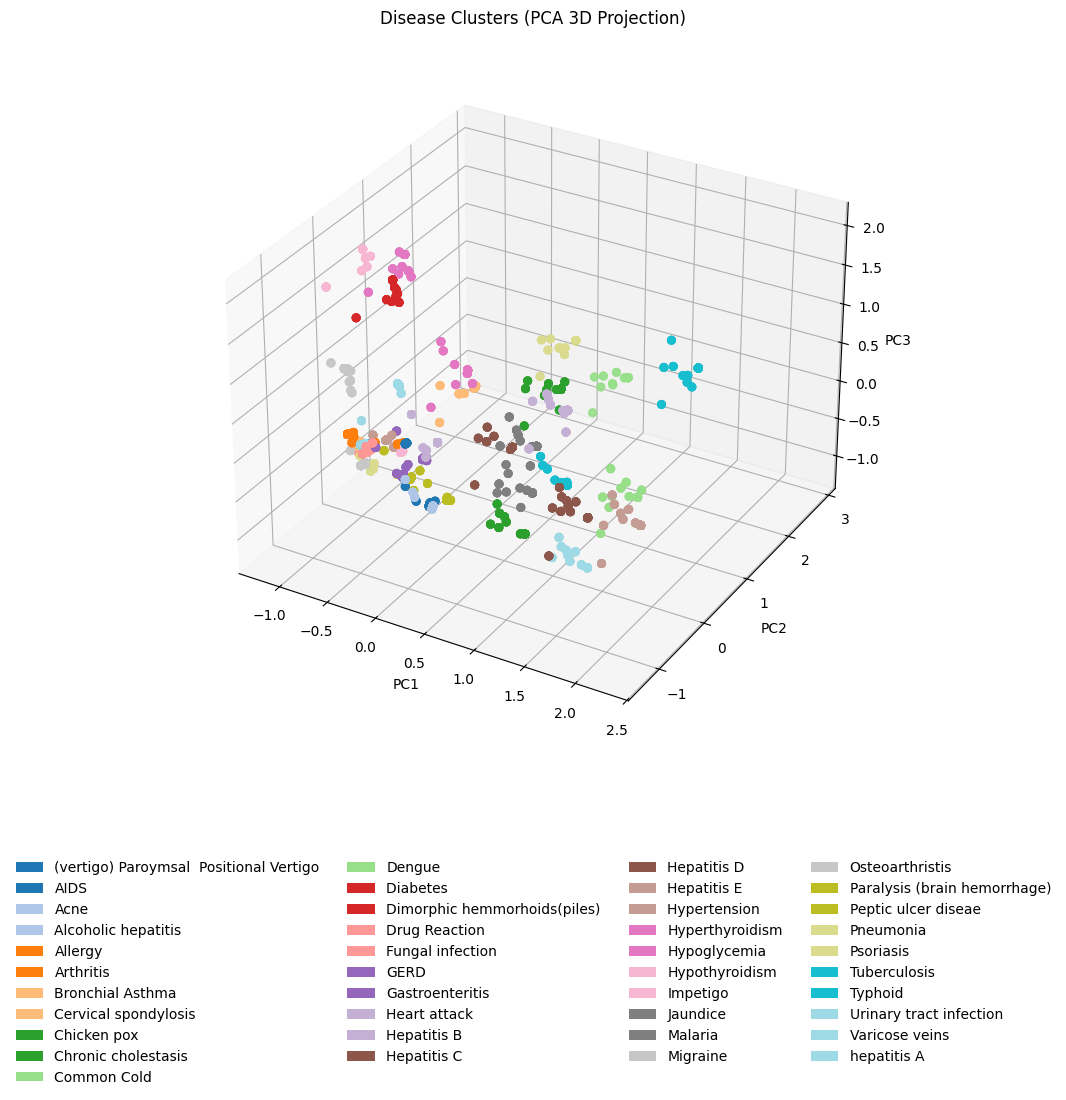

In [25]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

pca3_df = pd.DataFrame(X_pca[:,0:3], columns=['PC1','PC2','PC3'])
pca3_df['Disease'] = df['prognosis']
le = LabelEncoder()
pca3_df['Disease_code'] = le.fit_transform(pca3_df['Disease'])

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

num_classes = len(le.classes_)
colors = plt.cm.tab20(np.linspace(0, 1, num_classes))

color_map = [colors[i] for i in pca3_df['Disease_code']]

sc = ax.scatter(
    pca3_df['PC1'], pca3_df['PC2'], pca3_df['PC3'], 
    c=color_map, s=30
)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=le.classes_[i]) for i in range(num_classes)]

ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=4, fontsize=10, frameon=False)  # ncol adjusts number of columns

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title("Disease Clusters (PCA 3D Projection)", pad=20)

plt.show()


In [26]:
X_pca.shape

(4920, 36)

In [27]:
# Doing Label Encoding on y
label = LabelEncoder()
y = label.fit_transform(df['prognosis'])

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.3,stratify=y)

In [29]:
x_train.shape,x_test.shape

((3444, 36), (1476, 36))

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [31]:
models = {
    "RandomForestClassifier":RandomForestClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "XGBClassifier":XGBClassifier(),
    "LogisticRegression":LogisticRegression(),
    "SVC":SVC()
}

In [32]:
params = {
    "RandomForestClassifier": {
        "n_estimators": [50, 100, 150,200],
        "max_depth": [3, 5, 7, 9],
        "min_samples_split": [3, 5, 8]
    },
    "DecisionTreeClassifier": {
        "max_depth": [3,5,7,9 ,10, 15],
        "min_samples_split": [2, 4, 6],
        "criterion": ["gini", "entropy"]
    },
    "XGBClassifier": {
        "n_estimators": [50, 100, 150,200],
        "max_depth": [3, 6, 9],
        "learning_rate": [0.01, 0.1, 1]
    },
    "LogisticRegression": {
        "solver": ["lbfgs", "saga"],
        "C": [0.1, 0.5, 1.0, 2.0],
        "penalty": ["l1", "l2"]
    },
    "SVC": {
        "C": [0.1, 1, 10, 50],
        "kernel": ["linear", "rbf", "poly", "sigmoid"],
        "gamma": ["scale", "auto"]
    }
}


===== Training RandomForestClassifier =====


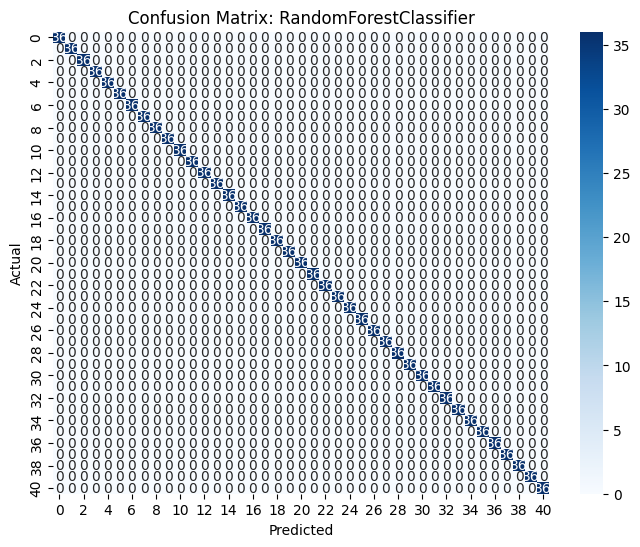

===== Finished RandomForestClassifier =====

===== Training DecisionTreeClassifier =====


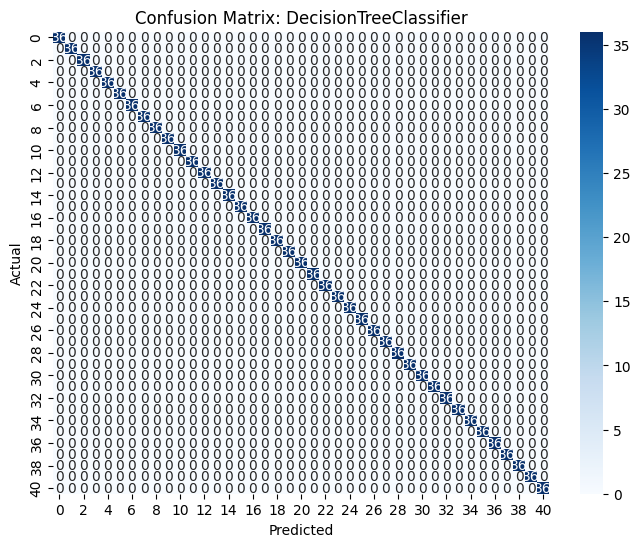

===== Finished DecisionTreeClassifier =====

===== Training XGBClassifier =====


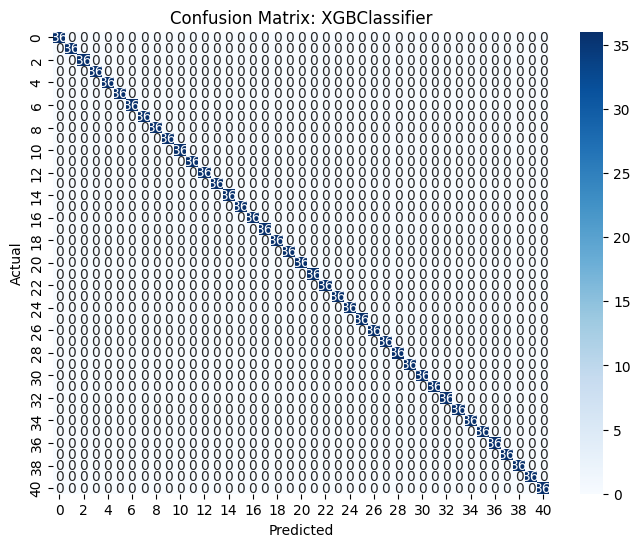

===== Finished XGBClassifier =====

===== Training LogisticRegression =====


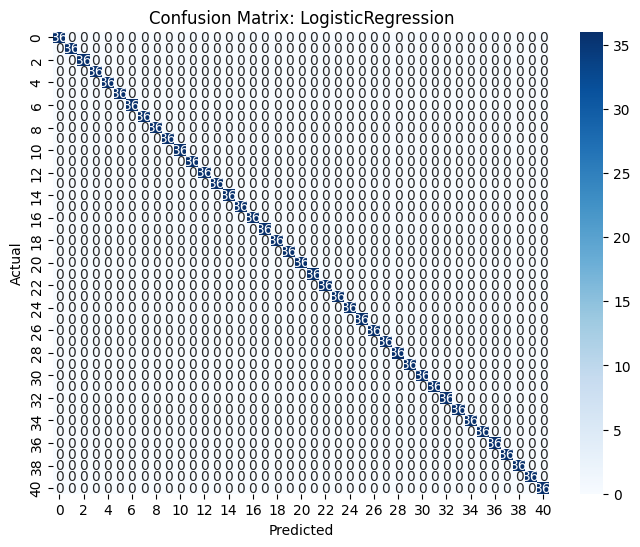

===== Finished LogisticRegression =====

===== Training SVC =====


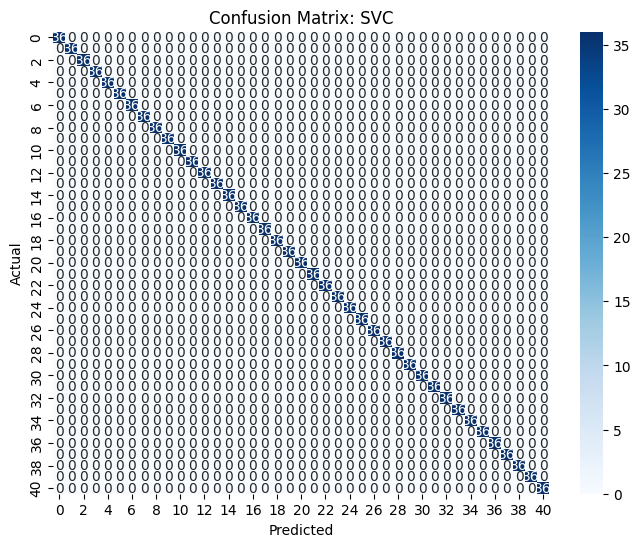

===== Finished SVC =====

Summary of All Models:

                    Model  \
0  RandomForestClassifier   
1  DecisionTreeClassifier   
2           XGBClassifier   
3      LogisticRegression   
4                     SVC   

                                                        Best_Params  \
0      {'max_depth': 9, 'min_samples_split': 3, 'n_estimators': 50}   
1  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 4}   
2        {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}   
3                    {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}   
4                  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}   

   Train_Acc  Test_Acc  Precision  Recall  F1_Score  
0        1.0       1.0        1.0     1.0       1.0  
1        1.0       1.0        1.0     1.0       1.0  
2        1.0       1.0        1.0     1.0       1.0  
3        1.0       1.0        1.0     1.0       1.0  
4        1.0       1.0        1.0     1.0       1.0  


In [33]:
# Doing Gridsearch CV with cv = 3 and scoring parameter as accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


summary = []

for name, model in models.items():
    print(f"===== Training {name} =====")
    
    param_grid = params[name]
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
    grid.fit(x_train, y_train)
    
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    y_train_pred = best_model.predict(x_train)
    y_test_pred = best_model.predict(x_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    report = classification_report(y_test, y_test_pred, output_dict=True)
    
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1 = report['macro avg']['f1-score']
    
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    summary.append({
        "Model": name,
        "Best_Params": best_params,
        "Train_Acc": train_acc,
        "Test_Acc": test_acc,
        "Precision": precision,
        "Recall": recall,
        "F1_Score": f1
    })
    
    print(f"===== Finished {name} =====\n")

summary_df = pd.DataFrame(summary)
summary_df = summary_df.sort_values(by='F1_Score', ascending=False)
print("Summary of All Models:\n")
print(summary_df)

In [34]:
model = LogisticRegression(C=0.1, penalty='l2', solver ='lbfgs')
model.fit(x_train,y_train)

LogisticRegression(C=0.1)

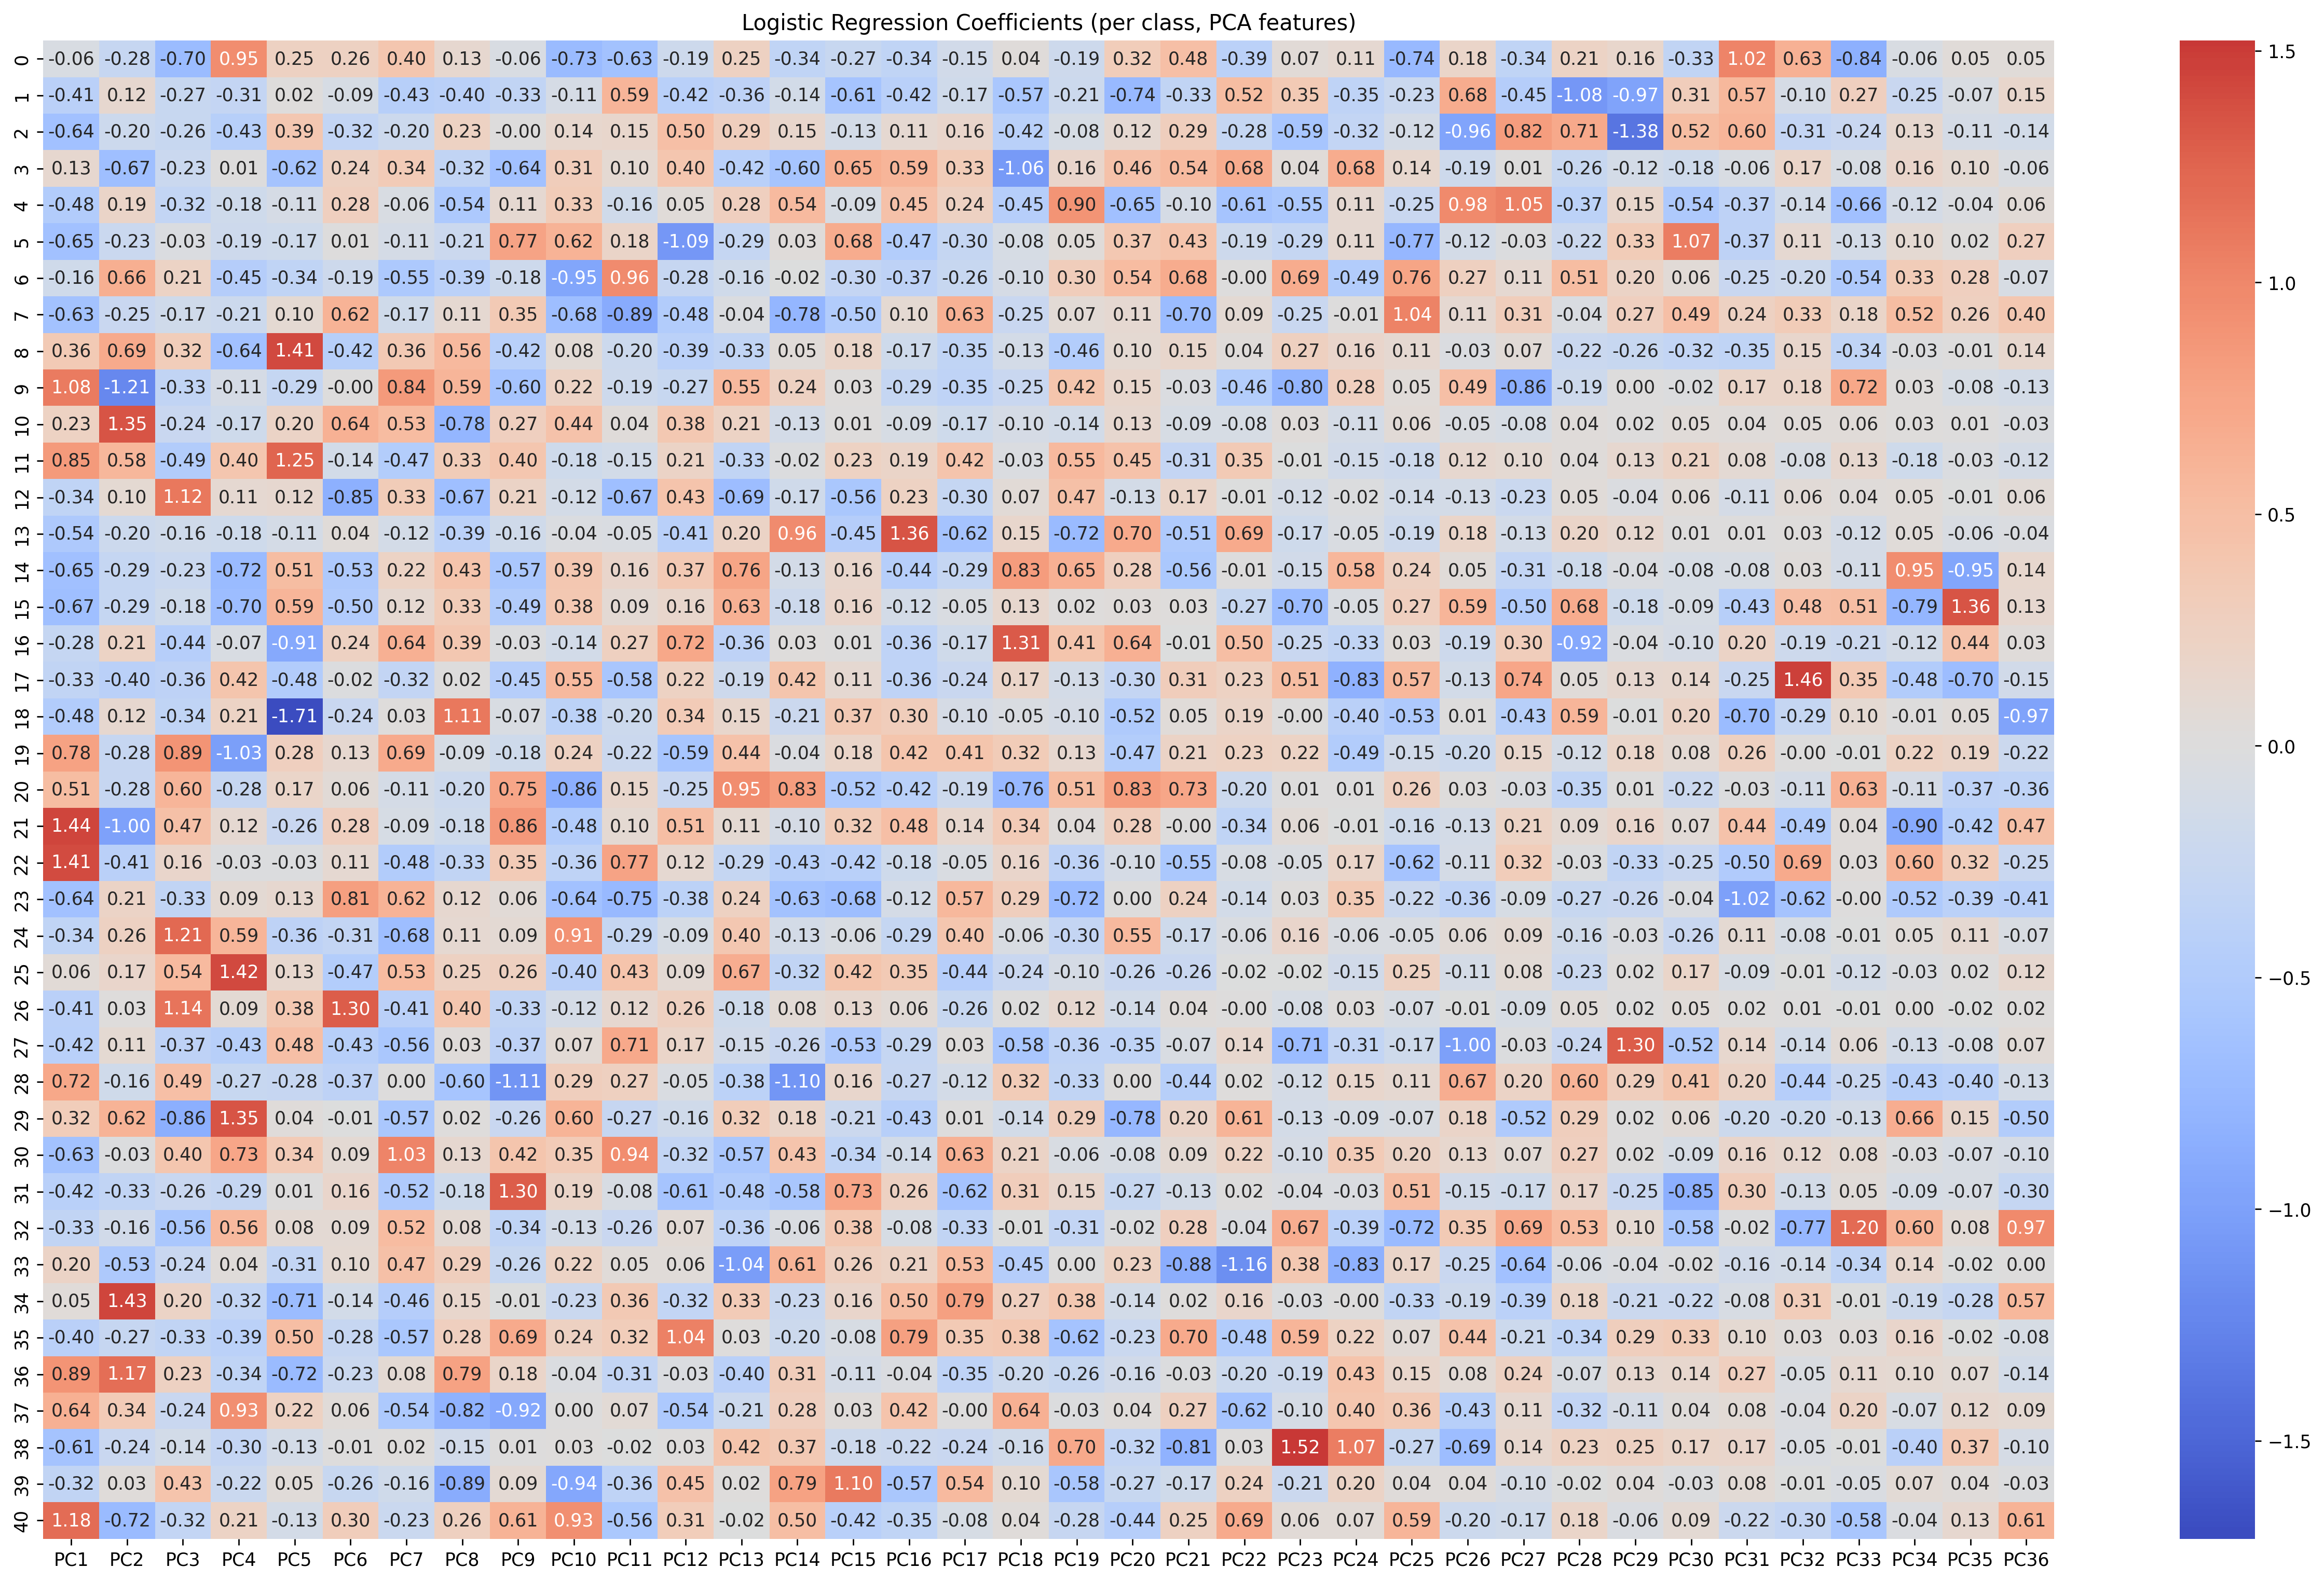

In [45]:
coef_df = pd.DataFrame(model.coef_, 
                       columns=[f"PC{i+1}" for i in range(x_train.shape[1])],
                       index=model.classes_)

plt.figure(figsize=(25,15),dpi=250)
sns.heatmap(coef_df, annot=True, cmap="coolwarm", center=0,fmt=".2f")
plt.title("Logistic Regression Coefficients (per class, PCA features)")
plt.show()

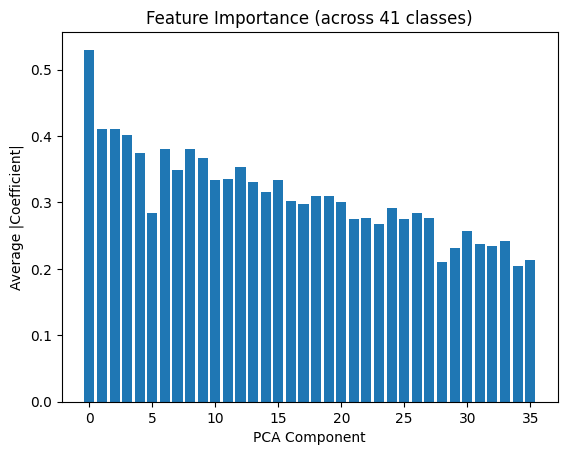

In [ ]:
coef_abs = np.mean(np.abs(model.coef_), axis=0)
plt.bar(range(len(coef_abs)), coef_abs)
plt.xlabel("PCA Component")
plt.ylabel("Average |Coefficient|")
plt.title("Feature Importance (across 41 classes)")
plt.show()